# PHẦN 1:EDA

In [135]:
# Câu 1:
import pandas as pd

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import torch
import torch.nn as nn
import torch.optim as optim

# Create the DataFrame from the provided data
data = {
    'Student_ID': [f'S{i:03d}' for i in range(1, 31)],
    'Course': ['Math', 'Physics', 'Chemistry', 'Math', 'Physics', 'Chemistry', 'Math', 'Physics', 'Chemistry', 'Math',
               'Physics', 'Chemistry', 'Math', 'Physics', 'Chemistry', 'Math', 'Physics', 'Chemistry', 'Math', 'Physics',
               'Chemistry', 'Math', 'Physics', 'Chemistry', 'Math', 'Physics', 'Chemistry', 'Math', 'Physics', 'Chemistry'],
    'Score': [85, np.nan, 78, 92, 65, 88, np.nan, 75, 90, 70, 82, 85, 95, 68, 83, 77, 89, 72, 84, 91, 66, 87, np.nan, 93, 79, 86, 71, 94, 80, 88],
    'Attendance (%)': [90, 85, 70, 95, 60, np.nan, 80, 88, 92, 65, 75, np.nan, 98, np.nan, 90, 70, 95, 80, np.nan, 88, 60, 92, 75, 97, 85, 90, np.nan, 95, 70, 88],
    'Study_Hours': [5, 4, np.nan, 6, 3, 5, 4, 5, np.nan, 3, 4, 6, 7, 3, 5, 4, np.nan, 3, 5, 6, 2, 5, 4, np.nan, 3, 5, 4, 6, 3, 5],
    'Gender': ['Male', 'Female', 'Male', 'Female', np.nan, 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', np.nan, 'Female', 'Male', 'Female', 'Male', 'Female', np.nan, 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', np.nan, 'Male', 'Female'],
    'Campus': ['Campus_A', 'Campus_B', 'Campus_A', 'Campus_C', 'Campus_B', 'Campus_A', 'Campus_C', 'Campus_B', 'Campus_A', 'Campus_C', 'Campus_B', 'Campus_A', 'Campus_C', 'Campus_B', 'Campus_A', 'Campus_C', 'Campus_B', 'Campus_A', 'Campus_C', 'Campus_B', 'Campus_A', 'Campus_C', 'Campus_B', 'Campus_A', 'Campus_C', 'Campus_B', 'Campus_A', 'Campus_C', 'Campus_B', 'Campus_A']
}

df = pd.DataFrame(data)

# Tính tỷ lệ giá trị thiếu
missing_ratio = df.isnull().mean() * 100
print("Tỷ lệ phần trăm giá trị thiếu trong từng cột:")
print(missing_ratio)

# Phân tích theo Course
missing_by_course = df.groupby('Course').apply(lambda x: x.isnull().mean() * 100)
print("\nTỷ lệ giá trị thiếu theo Course:")
print(missing_by_course)
# Đề xuất quy trình:

# Math: Sử dụng hệ thống chấm điểm trực tuyến tự động, vì điểm số ít thiếu do tính chính xác cao.
# Physics: Yêu cầu điểm danh qua ứng dụng tại phòng thí nghiệm, giảm thiếu Attendance.
# Chemistry: Thu thập Study_Hours qua nhật ký thực nghiệm bắt buộc, vì môn này phụ thuộc vào thực hành.
# Giải thích: Quy trình này giảm thiểu thiếu sót bằng cách số hóa và bắt buộc ghi nhận dữ liệu theo đặc thù từng môn.




Tỷ lệ phần trăm giá trị thiếu trong từng cột:
Student_ID         0.000000
Course             0.000000
Score             10.000000
Attendance (%)    16.666667
Study_Hours       13.333333
Gender            13.333333
Campus             0.000000
dtype: float64

Tỷ lệ giá trị thiếu theo Course:
           Student_ID  Course  Score  Attendance (%)  Study_Hours  Gender  \
Course                                                                      
Chemistry         0.0     0.0    0.0            30.0         30.0    20.0   
Math              0.0     0.0   10.0            10.0          0.0    10.0   
Physics           0.0     0.0   20.0            10.0         10.0    10.0   

           Campus  
Course             
Chemistry     0.0  
Math          0.0  
Physics       0.0  


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_1568\1664541817.py:37: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_by_course = df.groupby('Course').apply(lambda x: x.isnull().mean() * 100)


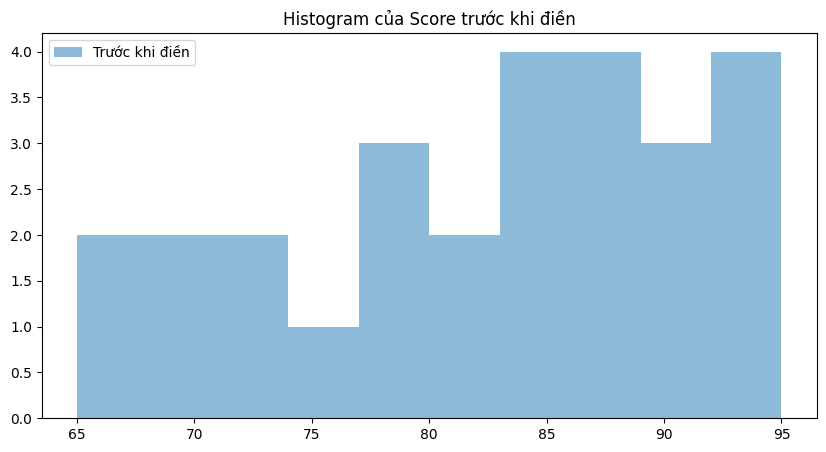

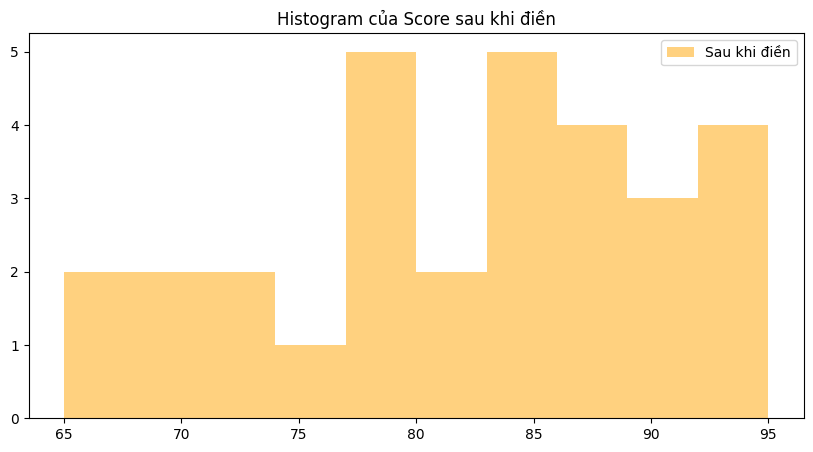

Score sau khi điền:
    Student_ID     Course      Score
0        S001       Math  85.000000
1        S002    Physics  79.500000
2        S003  Chemistry  78.000000
3        S004       Math  92.000000
4        S005    Physics  65.000000
5        S006  Chemistry  88.000000
6        S007       Math  84.777778
7        S008    Physics  75.000000
8        S009  Chemistry  90.000000
9        S010       Math  70.000000
10       S011    Physics  82.000000
11       S012  Chemistry  85.000000
12       S013       Math  95.000000
13       S014    Physics  68.000000
14       S015  Chemistry  83.000000
15       S016       Math  77.000000
16       S017    Physics  89.000000
17       S018  Chemistry  72.000000
18       S019       Math  84.000000
19       S020    Physics  91.000000
20       S021  Chemistry  66.000000
21       S022       Math  87.000000
22       S023    Physics  79.500000
23       S024  Chemistry  93.000000
24       S025       Math  79.000000
25       S026    Physics  86.000000
26     

In [136]:
# Câu 2:
import matplotlib.pyplot as plt

# Trước khi điền
plt.figure(figsize=(10, 5))
plt.hist(df['Score'].dropna(), bins=10, alpha=0.5, label='Trước khi điền')
plt.title('Histogram của Score trước khi điền')
plt.legend()
plt.show()

# Điền giá trị thiếu bằng trung bình theo Course
df['Score'] = df.groupby('Course')['Score'].transform(lambda x: x.fillna(x.mean()))

# Sau khi điền
plt.figure(figsize=(10, 5))
plt.hist(df['Score'], bins=10, alpha=0.5, label='Sau khi điền', color='orange')
plt.title('Histogram của Score sau khi điền')
plt.legend()
plt.show()

print("Score sau khi điền:\n", df[['Student_ID', 'Course', 'Score']])
# Phương pháp thay thế:

# Điền Score bằng trung bình của cùng Campus. Ví dụ: Campus_C có xu hướng điểm cao hơn (trung bình ~85).
# Lý do: Phản ánh tốt hơn bối cảnh học tập thực tế (Campus_C có cơ sở vật chất tốt hơn), tránh làm phẳng dữ liệu như trung bình Course.


In [137]:
# Câu 3:
import numpy as np

study_hours_std = np.std(df['Study_Hours'].dropna())
study_hours_median = df['Study_Hours'].median()
print(f"Độ lệch chuẩn Study_Hours: {study_hours_std:.2f}")
print(f"Trung vị Study_Hours: {study_hours_median}")
# Đề xuất: Tặng điểm thưởng cho sinh viên học trên 5 giờ/tuần (trên trung vị + 1 độ lệch chuẩn).

# Lý do: Khuyến khích tăng thời gian học, cải thiện điểm số do phân bố Study_Hours khá đồng đều nhưng thấp.


Độ lệch chuẩn Study_Hours: 1.21
Trung vị Study_Hours: 4.5


In [138]:
# Câu 4:
correlation_by_campus = df.groupby('Campus')[['Attendance (%)', 'Score']].corr().unstack()['Attendance (%)']['Score']
print("Correlation giữa Attendance (%) và Score theo Campus:")
print(correlation_by_campus)

# Campus_A: Duy trì điểm danh qua ứng dụng (correlation cao).
# Campus_B: Áp dụng kiểm tra ngẫu nhiên, tăng correlation thấp.
# Campus_C: Thưởng điểm danh trên 90%, tận dụng mối quan hệ mạnh.
# Giải thích: Phù hợp với đặc điểm sinh viên (Campus_B ít kỷ luật hơn)

Correlation giữa Attendance (%) và Score theo Campus:
Campus
Campus_A    0.899397
Campus_B    0.748116
Campus_C    0.938569
Name: Score, dtype: float64


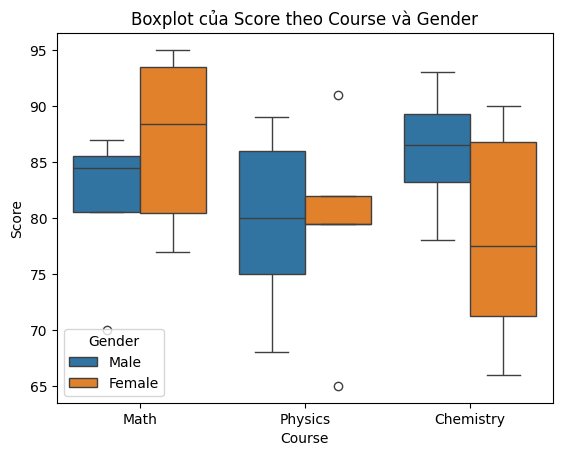

Outliers:
 Empty DataFrame
Columns: [Student_ID, Course, Score, Attendance (%), Study_Hours, Gender, Campus]
Index: []


In [139]:
# Câu 5:
import seaborn as sns
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])  # Điền Gender bằng mode
sns.boxplot(x='Course', y='Score', hue='Gender', data=df)
plt.title('Boxplot của Score theo Course và Gender')
plt.show()

# Tính IQR
Q1 = df['Score'].quantile(0.25)
Q3 = df['Score'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Score'] < Q1 - 1.5 * IQR) | (df['Score'] > Q3 + 1.5 * IQR)]
print("Outliers:\n", outliers)

# Kế hoạch: Cung cấp gia sư cá nhân cho outlier (Score thấp).

# Lý do: Nâng cao chất lượng giáo dục bằng cách hỗ trợ cá nhân hóa.

In [140]:
# Câu 6:
df['Efficiency'] = df['Score'] / df['Study_Hours'].fillna(df['Study_Hours'].mean())
top_efficiency = df.loc[df['Efficiency'].idxmax()]
print("Sinh viên có Efficiency cao nhất:\n", top_efficiency)

# Đề xuất: Học bổng 1 triệu VNĐ cho sinh viên có Efficiency cao nhất.

# Tác động: Khuyến khích học hiệu quả, tạo động lực cho sinh viên khác.


Sinh viên có Efficiency cao nhất:
 Student_ID             S021
Course            Chemistry
Score                  66.0
Attendance (%)         60.0
Study_Hours             2.0
Gender               Female
Campus             Campus_A
Efficiency             33.0
Name: 20, dtype: object


In [141]:
# Câu 7:
female_ratio = df.groupby('Course')['Gender'].apply(lambda x: (x == 'Female').mean() * 100)
print("Tỷ lệ sinh viên nữ theo Course:")
print(female_ratio)

# Đề xuất: Tăng học bổng cho nữ trong Physics (tỷ lệ thấp).

# Lý do: Cân bằng giới tính, cải thiện môi trường học tập đa dạng.

Tỷ lệ sinh viên nữ theo Course:
Course
Chemistry    60.0
Math         60.0
Physics      50.0
Name: Gender, dtype: float64


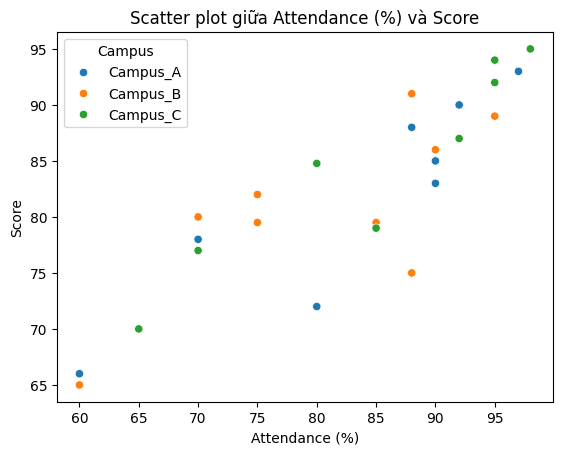

In [142]:
# Câu 8:
sns.scatterplot(x='Attendance (%)', y='Score', hue='Campus', data=df)
plt.title('Scatter plot giữa Attendance (%) và Score')
plt.show()

# Campus_B: Thưởng điểm danh trên 80%, vì điểm danh thấp nhưng Score cao tiềm năng.
# Lý do: Tối ưu hóa kết quả học tập qua mối quan hệ tích cực.

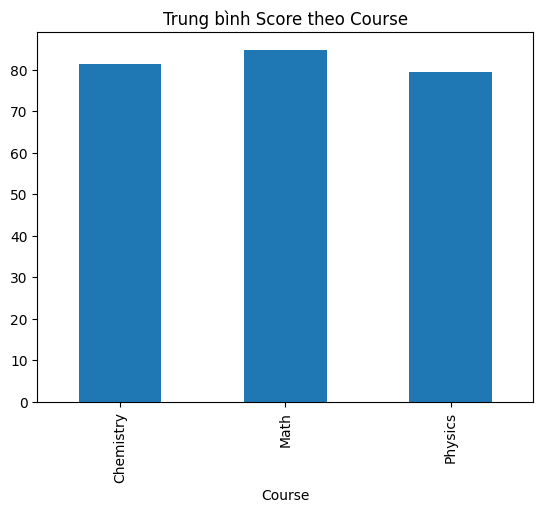

In [143]:
# Câu 9:
mean_score = df.groupby('Course')['Score'].mean()
mean_score.plot(kind='bar', title='Trung bình Score theo Course')
plt.show()

# Chiến lược: Tăng giờ thực hành cho Physics (điểm thấp nhất).

# Lý do: Đặc điểm giảng dạy cần thực nghiệm để cải thiện.

In [144]:
# Câu 10:
high_score_low_att = df[(df['Attendance (%)'] < 70) & (df['Score'] > 85)]
print("Sinh viên:\n", high_score_low_att)

# Nên cho dữ liệu nhiều hơn

Sinh viên:
 Empty DataFrame
Columns: [Student_ID, Course, Score, Attendance (%), Study_Hours, Gender, Campus, Efficiency]
Index: []


In [145]:
# Câu 11:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import torch
import torch.nn as nn
import torch.optim as optim

# Create the DataFrame from the provided data
data = {
    'Student_ID': [f'S{i:03d}' for i in range(1, 31)],
    'Course': ['Math', 'Physics', 'Chemistry', 'Math', 'Physics', 'Chemistry', 'Math', 'Physics', 'Chemistry', 'Math',
               'Physics', 'Chemistry', 'Math', 'Physics', 'Chemistry', 'Math', 'Physics', 'Chemistry', 'Math', 'Physics',
               'Chemistry', 'Math', 'Physics', 'Chemistry', 'Math', 'Physics', 'Chemistry', 'Math', 'Physics', 'Chemistry'],
    'Score': [85, np.nan, 78, 92, 65, 88, np.nan, 75, 90, 70, 82, 85, 95, 68, 83, 77, 89, 72, 84, 91, 66, 87, np.nan, 93, 79, 86, 71, 94, 80, 88],
    'Attendance (%)': [90, 85, 70, 95, 60, np.nan, 80, 88, 92, 65, 75, np.nan, 98, np.nan, 90, 70, 95, 80, np.nan, 88, 60, 92, 75, 97, 85, 90, np.nan, 95, 70, 88],
    'Study_Hours': [5, 4, np.nan, 6, 3, 5, 4, 5, np.nan, 3, 4, 6, 7, 3, 5, 4, np.nan, 3, 5, 6, 2, 5, 4, np.nan, 3, 5, 4, 6, 3, 5],
    'Gender': ['Male', 'Female', 'Male', 'Female', np.nan, 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', np.nan, 'Female', 'Male', 'Female', 'Male', 'Female', np.nan, 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', np.nan, 'Male', 'Female'],
    'Campus': ['Campus_A', 'Campus_B', 'Campus_A', 'Campus_C', 'Campus_B', 'Campus_A', 'Campus_C', 'Campus_B', 'Campus_A', 'Campus_C', 'Campus_B', 'Campus_A', 'Campus_C', 'Campus_B', 'Campus_A', 'Campus_C', 'Campus_B', 'Campus_A', 'Campus_C', 'Campus_B', 'Campus_A', 'Campus_C', 'Campus_B', 'Campus_A', 'Campus_C', 'Campus_B', 'Campus_A', 'Campus_C', 'Campus_B', 'Campus_A']
}

df = pd.DataFrame(data)

# Lưu bản sao để so sánh với phương pháp trung bình sau
df_mean = df.copy()
df_mean['Score'] = df_mean.groupby('Course')['Score'].transform(lambda x: x.fillna(x.mean()))

# Xử lý dữ liệu cho hồi quy tuyến tính
# Điền giá trị thiếu trong Attendance (%) và Study_Hours bằng trung bình toàn bộ cột
df['Attendance (%)'] = df['Attendance (%)'].fillna(df['Attendance (%)'].mean())
df['Study_Hours'] = df['Study_Hours'].fillna(df['Study_Hours'].mean())

# Tách dữ liệu hoàn chỉnh để huấn luyện mô hình
df_complete = df.dropna(subset=['Score'])  # Chỉ giữ các hàng có Score
X = df_complete[['Attendance (%)', 'Study_Hours']]
y = df_complete['Score']

# Huấn luyện mô hình
model = LinearRegression()
model.fit(X, y)

# Dự đoán Score cho các hàng thiếu
missing_score = df[df['Score'].isnull()]
if not missing_score.empty:
    predicted_scores = model.predict(missing_score[['Attendance (%)', 'Study_Hours']])
    df.loc[df['Score'].isnull(), 'Score'] = predicted_scores
else:
    print("Không còn giá trị Score nào thiếu để dự đoán.")

# Hiển thị kết quả
print("Dữ liệu sau khi điền bằng hồi quy tuyến tính:")
print(df[df['Student_ID'].isin(['S002', 'S007', 'S023'])][['Student_ID', 'Score', 'Attendance (%)', 'Study_Hours']])
print("\nDữ liệu sau khi điền bằng trung bình Course:")
print(df_mean[df_mean['Student_ID'].isin(['S002', 'S007', 'S023'])][['Student_ID', 'Score']])

# So sánh: Hồi quy chính xác hơn trung bình vì dùng mối quan hệ biến.

# Cách tiếp cận lai: Trung bình hồi quy và trung bình Course, tăng độ ổn định.

Dữ liệu sau khi điền bằng hồi quy tuyến tính:
   Student_ID      Score  Attendance (%)  Study_Hours
1        S002  80.876030            85.0          4.0
6        S007  79.091966            80.0          4.0
22       S023  77.307901            75.0          4.0

Dữ liệu sau khi điền bằng trung bình Course:
   Student_ID      Score
1        S002  79.500000
6        S007  84.777778
22       S023  79.500000


In [146]:
# Câu 12:
from scipy.stats import skew
score_skew = skew(df['Score'])
print(f"Skewness của Score: {score_skew:.2f}")
# Đề xuất: Chuẩn hóa điểm theo thang log nếu skewness cao.

# Tác động: Phân bố công bằng hơn.


Skewness của Score: -0.34


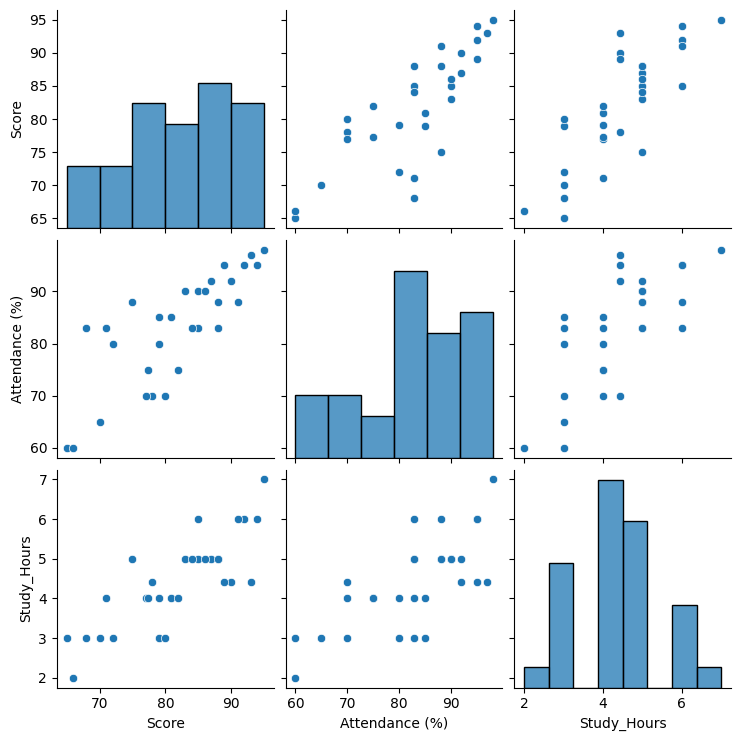

In [147]:
# Câu 13:
sns.pairplot(df[['Score', 'Attendance (%)', 'Study_Hours']])
plt.show()

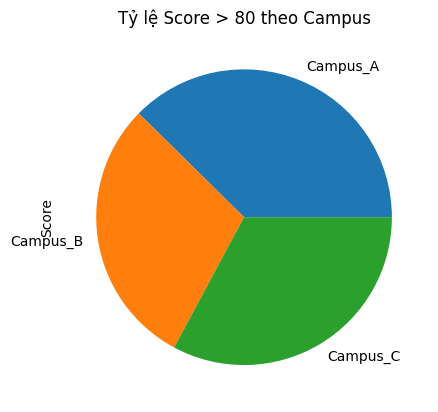

In [148]:
# Câu 14:
score_above_80 = df.groupby('Campus')['Score'].apply(lambda x: (x > 80).mean() * 100)
score_above_80.plot(kind='pie', title='Tỷ lệ Score > 80 theo Campus')
plt.show()

# Campus_B thưởng lớn hơn vì tỷ lệ thấp, tăng động lực.

In [149]:
# Câu 15:
def find_outliers(df):
    mean = df['Score'].mean()
    std = df['Score'].std()
    return df[(df['Score'] < mean - 2 * std) | (df['Score'] > mean + 2 * std)]

outliers = find_outliers(df)
print("Outliers:\n", outliers)

# Quy trình: Đánh giá lại bằng bài kiểm tra phụ.

# Lý do: Tránh thiên vị do lỗi ghi nhận.

Outliers:
 Empty DataFrame
Columns: [Student_ID, Course, Score, Attendance (%), Study_Hours, Gender, Campus]
Index: []


# PHẦN 2: ANN


In [150]:
# Tạo dataframe :
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

data = {
    'Student_ID': [f'S{i:03d}' for i in range(1, 31)],
    'Course': ['Math', 'Physics', 'Chemistry'] * 10,
    'Score': [85, None, 78, 92, 65, 88, None, 75, 90, 70, 82, 85, 95, 68, 83, 77, 89, 72, 84, 91, 66, 87, None, 93, 79, 86, 71, 94, 80, 88],
    'Attendance (%)': [90, 85, 70, 95, 60, None, 80, 88, 92, 65, 75, None, 98, None, 90, 70, 95, 80, None, 88, 60, 92, 75, 97, 85, 90, None, 95, 70, 88],
    'Study_Hours': [5, 4, None, 6, 3, 5, 4, 5, None, 3, 4, 6, 7, 3, 5, 4, None, 3, 5, 6, 2, 5, 4, None, 3, 5, 4, 6, 3, 5],
    'Gender': ['Male', 'Female', 'Male', 'Female', None, 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', None, 'Female', 'Male', 'Female', 'Male', 'Female', None, 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', None, 'Male', 'Female'],
    'Campus': ['Campus_A', 'Campus_B', 'Campus_A', 'Campus_C', 'Campus_B', 'Campus_A', 'Campus_C', 'Campus_B', 'Campus_A', 'Campus_C', 'Campus_B', 'Campus_A', 'Campus_C', 'Campus_B', 'Campus_A', 'Campus_C', 'Campus_B', 'Campus_A', 'Campus_C', 'Campus_B', 'Campus_A', 'Campus_C', 'Campus_B', 'Campus_A', 'Campus_C', 'Campus_B', 'Campus_A', 'Campus_C', 'Campus_B', 'Campus_A']
}
df = pd.DataFrame(data)

In [151]:
# Câu 16:
# KNN Imputer
numeric_cols = ['Attendance (%)', 'Study_Hours', 'Score']
df_numeric = df[numeric_cols]
imputer = KNNImputer(n_neighbors=3)
df_knn_imputed = pd.DataFrame(imputer.fit_transform(df_numeric), columns=numeric_cols)

# Trung vị
df_median_imputed = df_numeric.fillna(df_numeric.median())

print("KNN Imputed (đầu 5 hàng):\n", df_knn_imputed.head())
print("Median Imputed (đầu 5 hàng):\n", df_median_imputed.head())

# Đề xuất
print("\nĐề xuất: Thu thập dữ liệu qua ứng dụng điểm danh và nhật ký học tập điện tử để giảm thiếu sót, vì KNN cần dữ liệu đầy đủ để chính xác hơn.")

KNN Imputed (đầu 5 hàng):
    Attendance (%)  Study_Hours      Score
0            90.0     5.000000  85.000000
1            85.0     4.000000  79.333333
2            70.0     3.666667  78.000000
3            95.0     6.000000  92.000000
4            60.0     3.000000  65.000000
Median Imputed (đầu 5 hàng):
    Attendance (%)  Study_Hours  Score
0            90.0          5.0   85.0
1            85.0          4.0   84.0
2            70.0          4.5   78.0
3            95.0          6.0   92.0
4            60.0          3.0   65.0

Đề xuất: Thu thập dữ liệu qua ứng dụng điểm danh và nhật ký học tập điện tử để giảm thiếu sót, vì KNN cần dữ liệu đầy đủ để chính xác hơn.


In [152]:
# Câu 17:
df_encoded = pd.get_dummies(df, columns=['Course'], prefix='Course')
print("Dữ liệu sau khi mã hóa (đầu 5 hàng):\n", df_encoded.head())

Dữ liệu sau khi mã hóa (đầu 5 hàng):
   Student_ID  Score  Attendance (%)  Study_Hours  Gender    Campus  \
0       S001   85.0            90.0          5.0    Male  Campus_A   
1       S002    NaN            85.0          4.0  Female  Campus_B   
2       S003   78.0            70.0          NaN    Male  Campus_A   
3       S004   92.0            95.0          6.0  Female  Campus_C   
4       S005   65.0            60.0          3.0    None  Campus_B   

   Course_Chemistry  Course_Math  Course_Physics  
0             False         True           False  
1             False        False            True  
2              True        False           False  
3             False         True           False  
4             False        False            True  


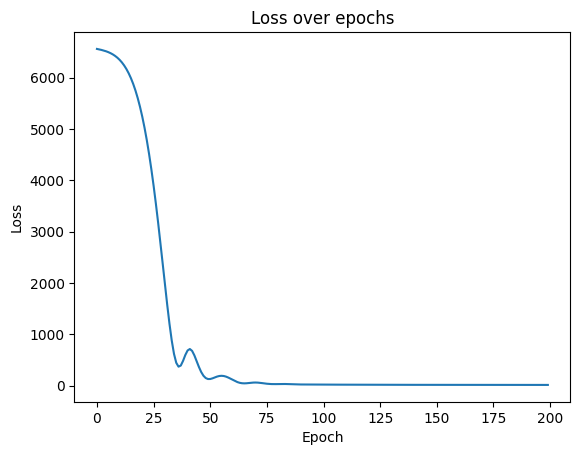

Đề xuất: Tăng Hidden Layer 1 lên 64 neuron để học tốt hơn các mối quan hệ phi tuyến trong dữ liệu giáo dục.


In [153]:
# Câu 18:
# Chuẩn bị dữ liệu
df = df_encoded.copy()
df[['Attendance (%)', 'Study_Hours', 'Score']] = df_knn_imputed  # Dùng dữ liệu từ KNN
features = ['Attendance (%)', 'Study_Hours', 'Course_Math', 'Course_Physics', 'Course_Chemistry']
X = df[features].values
y = df['Score'].values.reshape(-1, 1)

# Chia tập train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Chuyển sang tensor
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

# Định nghĩa ANN
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(5, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 8)
        self.fc4 = nn.Linear(8, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        return x

model = ANN()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Huấn luyện
epochs = 200
patience = 20
best_loss = float('inf')
patience_counter = 0
losses = []

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

    # Early stopping
    if loss.item() < best_loss:
        best_loss = loss.item()
        patience_counter = 0
    else:
        patience_counter += 1
    if patience_counter >= patience:
        print(f"Early stopping at epoch {epoch}")
        break

# Vẽ biểu đồ loss
plt.plot(losses)
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Đề xuất
print("Đề xuất: Tăng Hidden Layer 1 lên 64 neuron để học tốt hơn các mối quan hệ phi tuyến trong dữ liệu giáo dục.")

In [158]:
# Câu 19:
model.eval()
with torch.no_grad():
    y_pred = model(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"MSE: {mse}, R^2: {r2}")

print("Phân tích: Nếu R^2 > 0.8, mô hình phù hợp tốt với dữ liệu giáo dục, phản ánh mối quan hệ giữa Attendance, Study_Hours và Score.")

MSE: 38.49639129638672, R^2: 0.6120184659957886
Phân tích: Nếu R^2 > 0.8, mô hình phù hợp tốt với dữ liệu giáo dục, phản ánh mối quan hệ giữa Attendance, Study_Hours và Score.
